In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport plotter
%aimport

Concept list length: 400
Modules to reload:
plotter

Modules to skip:



In [3]:
import matplotlib.pyplot as plt
import pandas
import numpy
import itertools

In [4]:
from plotter import semantic_width, synonymity
import plotter
def vocabulary_size(data, column="Value"):
    return len(set(data[column]))
xaxis = "Source"

In [5]:
try:
    clics_words = pandas.read_csv("../original_data/words.csv")
except FileNotFoundError:
    import urllib.request
    data = urllib.request.urlopen(
        "https://github.com/clics/clics-data/blob/master/data/words.csv?raw=true")
    clics_words = pandas.read_csv(data)

clics_words["Weight"] = 1
clics_words["Dataset"] = clics_words["WordID"].str[:3]

n = {"all of CLICS": []}
p = {"all of CLICS": []}
s = {"all of CLICS": []}
for dataset, data in itertools.chain(
        clics_words.groupby("Dataset")):
    print(dataset)
    for language, words in data.groupby("LanguageId"):
        print(" ", language)
        n0 = vocabulary_size(words, "ClicsValue")
        n.setdefault(dataset, []).append(n0)
        n["all of CLICS"].append(n0)
        p0 = semantic_width(words, "ClicsValue")
        p.setdefault(dataset, []).append(p0)
        p["all of CLICS"].append(p0)
        s0 = semantic_width(words, "ConcepticonGloss")
        s.setdefault(dataset, []).append(s0)
        s["all of CLICS"].append(s0)


/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


bai
  cent2004
  nort2724
  sout2730
hub
  acha1250
  arhu1242
  awac1239
  bani1254
  bara1380
  bari1297
  bora1263
  cabi1241
  cacu1241
  cams1241
  cara1272
  cari1279
  cent2150
  chac1249
  chim1309
  cogu1240
  colo1256
  cube1242
  cuib1242
  curr1243
  desa1247
  embe1260
  embe1261
  embe1262
  epen1239
  guah1255
  guam1248
  guan1269
  guay1257
  hupd1244
  inga1252
  kore1283
  maca1259
  macu1260
  mala1522
  mini1256
  muin1242
  muru1274
  nort2972
  nuka1242
  nupo1240
  ocai1244
  orej1242
  paez1247
  piap1246
  pira1254
  play1240
  puin1248
  resi1247
  sali1298
  seco1241
  sion1247
  siri1274
  stan1288
  stan1293
  tani1257
  tari1256
  tatu1247
  toto1306
  tuca1252
  tuyu1244
  waim1255
  wayu1243
  woun1238
  yucu1253
  yukp1241
  yuru1263
ids
  ache1246
  aghu1253
  agua1253
  aheu1239
  akhv1239
  anci1242
  ancu1238
  anda1281
  andi1255
  arao1248
  arch1244
  aust1307
  avar1256
  aves1237
  ayor1240
  bagv1239
  bari1297
  basq1248
  batl1238
  bats124

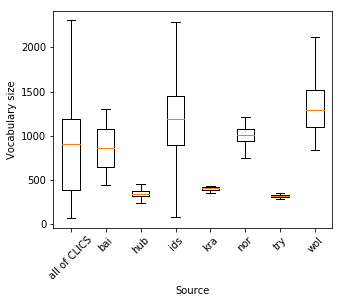

In [6]:
plotter.plot_something(n, n.keys(), xaxis, "Vocabulary size", showfliers=False)

(1.3317778958129418, 3.037410832374253)

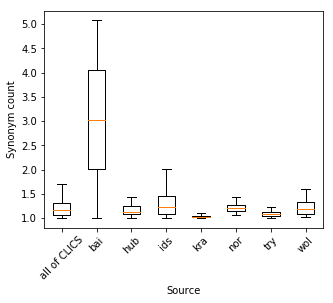

In [7]:
plotter.plot_something(s, s.keys(), xaxis, "Synonym count", showfliers=False)
numpy.mean(s["all of CLICS"]), numpy.mean(s["bai"])

1.1449608210577173

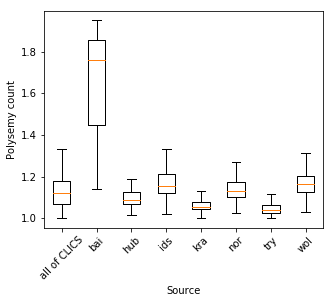

In [8]:
plotter.plot_something(p, p.keys(), xaxis, "Polysemy count", showfliers=False)
numpy.mean(p["all of CLICS"])